In [1]:
from typing import List

from dataclasses import dataclass
from datasets import load_dataset
import spacy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/opt/anaconda3/envs/outil_corpus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Show the first item of dataset

ds_path = '../../data/raw/data.parquet'  # Modify to load your own dataset
ds = load_dataset('parquet', split='train', data_files=ds_path)
print(ds[0])

{'id': 1, 'url': 'https://www.universalis.fr/encyclopedie/bauhaus/', 'title': 'BAUHAUS', 'intro': "Fondé en 1919 par Walter Gropius à Weimar, le Bauhaus (littéralement : « maison du bâtiment ») étendit ses recherches à tous les arts majeurs et appliqués, en vue de les intégrer à l'architecture. Selon le dessein de son fondateur, tous ceux qui participaient à l'édification du bâtiment devaient être pénétrés des principes du maître d'œuvre et créer en harmonie avec lui, la partie complétant le tout. Appelés par Walter Gropius, les plus grands artistes du temps y enseignèrent. Le Bauhaus suscita un vif intérêt dans le monde, mais provoqua de fortes réactions dans les milieux politiques allemands. Transféré à Dessau en 1925, puis à Berlin en 1932, il fut définitivement fermé par les nazis arrivés au pouvoir en 1933."}


In [3]:
@dataclass
class Data():
    idx: int
    url: str
    title: str
    intro: str
    intro_lemma: List[str]
    intro_len: int

In [4]:
nlp = spacy.load("fr_core_news_sm")

In [5]:
# Show the first item of dataset and the lemmatized text

data_list =[]
for item in ds:
    data = Data(idx=item['id'],
               url=item['url'],
               title=item['title'],
               intro=item['intro'],
               intro_lemma=[token.lemma_ for token in nlp(item['intro']) if token.pos_ != 'PUNCT'],
               intro_len=len(item['intro']))
    data_list.append(data)
    
print(data_list[0])

Data(idx=1, url='https://www.universalis.fr/encyclopedie/bauhaus/', title='BAUHAUS', intro="Fondé en 1919 par Walter Gropius à Weimar, le Bauhaus (littéralement : « maison du bâtiment ») étendit ses recherches à tous les arts majeurs et appliqués, en vue de les intégrer à l'architecture. Selon le dessein de son fondateur, tous ceux qui participaient à l'édification du bâtiment devaient être pénétrés des principes du maître d'œuvre et créer en harmonie avec lui, la partie complétant le tout. Appelés par Walter Gropius, les plus grands artistes du temps y enseignèrent. Le Bauhaus suscita un vif intérêt dans le monde, mais provoqua de fortes réactions dans les milieux politiques allemands. Transféré à Dessau en 1925, puis à Berlin en 1932, il fut définitivement fermé par les nazis arrivés au pouvoir en 1933.", intro_lemma=['fonder', 'en', '1919', 'par', 'Walter', 'Gropius', 'à', 'Weimar', 'le', 'bauhau', 'littéralement', '«', 'maison', 'de', 'bâtiment', 'étendre', 'son', 'recherche', 'à',

In [6]:
len_list = np.array([data.intro_len for data in data_list])

In [7]:
# Calculate mean, variance and standard deviation for length of phrases

mean = np.mean(len_list)
var = np.var(len_list)
std_dev = np.std(len_list)
print(f'Number of texts: {len(data_list)}')
print(f'Mean: {mean.round(2)} words/text')
print(f'Variance: {var.round(2)}')
print(f'Std deviation: {std_dev.round(2)}')

Number of texts: 353
Mean: 786.06 words/text
Variance: 214135.15
Std deviation: 462.75


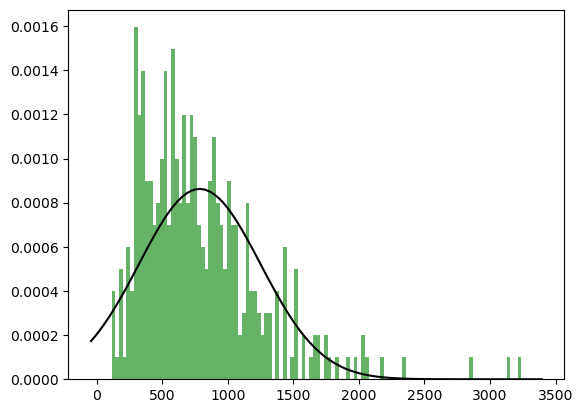

In [8]:
# Show phrase length distribution and comparison to normal distribution


plt.hist(len_list, bins=110, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y, 'k')
plt.show()

In [9]:
# Count words

lemma_count = {}

for data in data_list:
    for lemma in data.intro_lemma:
        if lemma not in lemma_count:
            lemma_count[lemma] = 1
        else:
            lemma_count[lemma] += 1

In [10]:
# Show the 20 most frequent words

sorted_lemma_count = sorted(lemma_count.items(), key=lambda item: item[1], reverse=True)
freq_words = list(sorted_lemma_count) [:20]

for word in freq_words:
    print(word)

('de', 4593)
('le', 4209)
('un', 1256)
('à', 1224)
('et', 1091)
('en', 733)
('être', 682)
('au', 584)
('avoir', 515)
('son', 497)
('-', 395)
('ce', 395)
('dans', 371)
('qui', 370)
('par', 362)
('que', 346)
('art', 338)
('l’', 324)
('exposition', 321)
('musée', 297)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


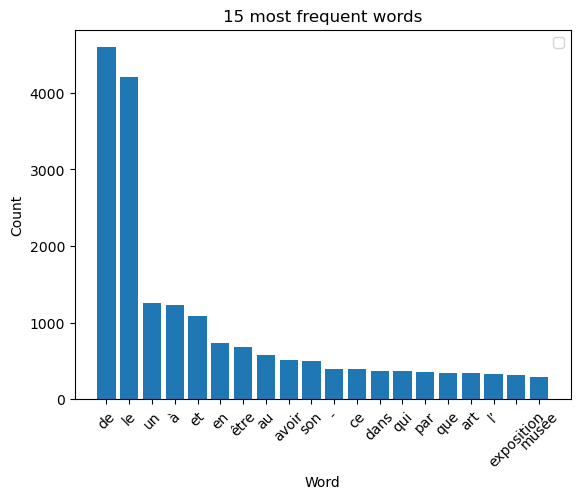

In [12]:
# Visualize the 20 most frequent words. Uncomment to show comparison with ziph's law

word_list = [word[0] for word in freq_words]
count_list = [count[1] for count in freq_words]

most_freq_count = count_list[0]
rank = np.arange(1, len(count_list) + 1)
zipf_dist = most_freq_count / rank

#plt.plot(word_list, zipf_dist, 'r-', linewidth=2, label='Zipf\'s Law')

plt.bar(word_list, count_list)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('15 most frequent words')
plt.xticks(rotation=45)
plt.legend()
plt.show()